In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import time

## Open the data

In [3]:
df = pd.read_csv('data_2024.csv')

In [4]:
# rename one column
df.rename(columns={'אינפלציה 1Y ידועה':'Known_inflation_1Y'}, inplace=True)

In [5]:
df.sort_index(ascending=False, inplace=True)
df.head(2)

,date,PE_RATIO,EST_PE_NEXT_YR_AGGTE,5Y GENERIC,1Y GENERIC,S&P 500 TR,PE Yield,Fwd PE Yield,FWD PE - 5Y,S&P 500 1 YEAR GAIN,S&P 500 FORWARD 1 YEAR GAIN,Known_inflation_1Y,GENERIC INFLATION INDEXED 5Y GOV BOND,EXPECTED INFLATION 5Y
408,1/31/1990,13.7883,10.5891,8.318,8.075,353.94,7.252526,9.443673,1.125673,NaN,8.391253,5.2,NaN,NaN
407,2/28/1990,13.9688,10.7204,8.451,8.109,358.50,7.158811,9.328010,0.877010,NaN,14.666667,5.3,NaN,NaN


In [6]:
this_month = df[-1:]
this_year = df[-12:]
this_year

,date,PE_RATIO,EST_PE_NEXT_YR_AGGTE,5Y GENERIC,1Y GENERIC,S&P 500 TR,PE Yield,Fwd PE Yield,FWD PE - 5Y,S&P 500 1 YEAR GAIN,S&P 500 FORWARD 1 YEAR GAIN,Known_inflation_1Y,GENERIC INFLATION INDEXED 5Y GOV BOND,EXPECTED INFLATION 5Y
11,2/28/2023,18.9142,16.3691,4.1818,4.9773,8479.80,5.287033,6.109071,1.927271,-7.691504,NaN,6.0,1.666,2.474574
10,3/31/2023,19.6271,17.0189,3.5733,4.5910,8791.13,5.094996,5.875820,2.302520,-7.728503,NaN,5.0,1.172,2.373483
9,4/28/2023,19.9145,17.2863,3.4828,4.7404,8928.35,5.021467,5.784928,2.302128,2.664244,NaN,4.9,1.248,2.207253
8,5/31/2023,20.0577,17.3041,3.7547,5.1726,8967.16,4.985616,5.778977,2.024277,2.921746,NaN,4.0,1.693,2.027377
7,6/30/2023,21.3668,18.4360,4.1556,5.3922,9559.67,4.680158,5.424170,1.268570,19.594092,NaN,3.0,1.994,2.119340
6,7/31/2023,22.0325,18.9588,4.1774,5.3779,9866.77,4.538750,5.274595,1.097195,13.015465,NaN,3.2,1.907,2.227914
5,8/31/2023,22.0812,18.3675,4.2541,5.3844,9709.68,4.528739,5.444399,1.190299,15.944507,NaN,3.7,2.135,2.074803
4,9/29/2023,21.0015,17.4623,4.6090,5.4484,9246.74,4.761565,5.726622,1.117622,21.617384,NaN,3.7,2.397,2.160220
3,10/31/2023,20.5399,17.1677,4.8536,5.4500,9052.31,4.868573,5.824892,0.971292,10.142845,NaN,3.2,2.473,2.323149
2,11/30/2023,21.9210,18.7221,4.2663,5.1172,9879.02,4.561836,5.341281,1.074981,13.839825,NaN,3.1,2.117,2.104743


In [7]:
df.dropna(inplace=True)
df = df[50:]
df

,date,PE_RATIO,EST_PE_NEXT_YR_AGGTE,5Y GENERIC,1Y GENERIC,S&P 500 TR,PE Yield,Fwd PE Yield,FWD PE - 5Y,S&P 500 1 YEAR GAIN,S&P 500 FORWARD 1 YEAR GAIN,Known_inflation_1Y,GENERIC INFLATION INDEXED 5Y GOV BOND,EXPECTED INFLATION 5Y
268,9/28/2001,22.6646,17.1015,3.8040,3.3030,1462.69,4.412167,5.847440,2.043440,-26.620780,-20.486227,2.6,2.772,1.004165
267,10/31/2001,23.1490,17.9703,3.4750,3.3030,1490.58,4.319841,5.564737,2.089737,-24.904404,-15.106200,2.1,2.652,0.801738
266,11/30/2001,25.0939,19.4357,4.0640,3.3030,1604.92,3.985032,5.145171,1.081171,-12.223669,-16.513596,1.9,3.087,0.947743
265,12/31/2001,27.1652,19.7474,4.3020,3.3030,1618.98,3.681180,5.063958,0.761958,-11.886011,-22.100335,1.6,3.288,0.981721
264,1/31/2002,26.8296,16.9964,4.3710,3.3030,1595.35,3.727227,5.883599,1.512599,-16.146750,-23.017520,1.1,3.073,1.259302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,9/30/2022,17.1449,14.9915,4.0900,3.9328,7603.14,5.832638,6.670447,2.580447,-15.472110,21.617384,8.2,1.989,2.060026
15,10/31/2022,18.5151,16.7154,4.2283,4.6019,8218.70,5.400997,5.982507,1.754207,-14.611087,10.142845,7.7,1.575,2.612159
14,11/30/2022,19.3312,17.8314,3.7367,4.6863,8678.00,5.172985,5.608085,1.871385,-9.210082,13.839825,7.1,1.304,2.401386
13,12/30/2022,18.2432,16.8213,4.0039,4.6868,8178.02,5.481494,5.944844,1.940944,-18.110887,26.287659,6.5,1.651,2.314685


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 268 to 12
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date                                   257 non-null    object 
 1   PE_RATIO                               257 non-null    float64
 2   EST_PE_NEXT_YR_AGGTE                   257 non-null    float64
 3   5Y GENERIC                             257 non-null    float64
 4   1Y GENERIC                             257 non-null    float64
 5   S&P 500 TR                             257 non-null    float64
 6   PE Yield                               257 non-null    float64
 7   Fwd PE Yield                           257 non-null    float64
 8   FWD PE - 5Y                            257 non-null    float64
 9   S&P 500 1 YEAR GAIN                    257 non-null    float64
 10  S&P 500 FORWARD 1 YEAR GAIN            257 non-null    float64
 11  Known_infl

## Parameters

In [9]:
# features = df.columns[[1,2,3,4,6,7,8,11,13]].to_list()
features = df.columns[[1,2,3,6,7,11,13]].to_list()
features

['PE_RATIO',
 'EST_PE_NEXT_YR_AGGTE',
 '5Y GENERIC',
 'PE Yield',
 'Fwd PE Yield',
 'Known_inflation_1Y',
 'EXPECTED INFLATION 5Y']

In [10]:
list(range(0, 10, 1)[1:])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
days_for_test = 48
target = 'S&P 500 FORWARD 1 YEAR GAIN'

# The yearly forward change in S&P 500 for classification (in %)
increase = 0

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = list(range(10)[1:])
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(10)[1:])
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Train-test split

### X

In [12]:
X = np.array(df[features])
X.shape

(257, 7)

In [13]:
# Split the data into training/testing sets
X_train = X[:-days_for_test]
X_test = X[-days_for_test:]

### This month and year, unknown y

In [14]:
X_this_month = np.array(this_month[features])
X_this_month

array([[23.31      , 20.0589    ,  3.8354    ,  4.29000429,  4.98531824,
         3.1       ,  2.20723869]])

In [15]:
X_this_year = np.array(this_year[features])
# X_this_year

### y for regression

In [16]:
y = np.array(df[target])

In [17]:
# df[['date',target]]

In [18]:
# Split the targets into training/testing sets
y_train = y[:-days_for_test]
y_test = y[-days_for_test:]

### y for classificator

<Axes: >

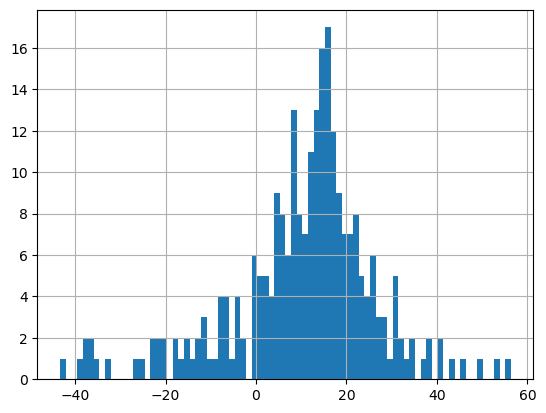

In [19]:
df[target].hist(bins=80)

In [20]:
df.shape

(257, 14)

In [21]:
y_classificated = np.where(y>increase, 1, 0)

In [22]:
y_classificated

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
# Split the targets into training/testing sets
y_classificated_train = y_classificated[:-days_for_test]
y_classificated_test = y_classificated[-days_for_test:]

In [24]:
index_test = df[['date', target]][-days_for_test:].index
index_test

Index([59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,
       41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24,
       23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12],
      dtype='int64')

# Linear regression

In [25]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [26]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [28]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
r_sqr_test = r2_score(y_test, y_pred)
print("R^2: %.2f" % r_sqr_test)

Coefficients: 
 [-3.58827554  4.01802979 -2.12434946 -5.42567571  7.6190923  -3.80788796
  0.91068595]
MSE: 453.10
R^2: -0.45


In [29]:
regression_result = pd.DataFrame([features, list(regr.coef_)]).T
regression_result.columns = ['Feature','Coefficient']
regression_result.set_index('Feature')

,Coefficient
Feature,
PE_RATIO,-3.588276
EST_PE_NEXT_YR_AGGTE,4.01803
5Y GENERIC,-2.124349
PE Yield,-5.425676
Fwd PE Yield,7.619092
Known_inflation_1Y,-3.807888
EXPECTED INFLATION 5Y,0.910686


## Linear regression with p-value

In [30]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     11.30
Date:                Thu, 29 Feb 2024   Prob (F-statistic):           4.74e-12
Time:                        14:53:42   Log-Likelihood:                -837.89
No. Observations:                 209   AIC:                             1692.
Df Residuals:                     201   BIC:                             1719.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1943     99.918      0.052      0.959    -191.828     202.217
x1            -3.5883      2.198     -1.632      0.104      -7.923       0.746
x2             4.0180      4.462      0.901      0.369      -4.780      12.816
x3            -2.1243      0.955     -2.223      0.027      -4.008      -0.240
x4            -5.4257      7.887     -0.688      0.492     -20.978      10.127
x5             7.6191      8.910      0.855      0.394      -9.951      25.189
x6            -3.8079      1.042     -3.655      0.000      -5.862      -1.753
x7             0.9107      2.741      0.332      0.740      -4.495       6.316
==============================================================================
Omnibus:                       33.787   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.827
Skew:                          -0.910   Prob(JB):                     5.57e-12
Kurtosis:                       4.624   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/s7/8_j4bgj967g5l_x97vbsfvwr0000gn/T/ipykernel_52591/619441070.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=1.0)


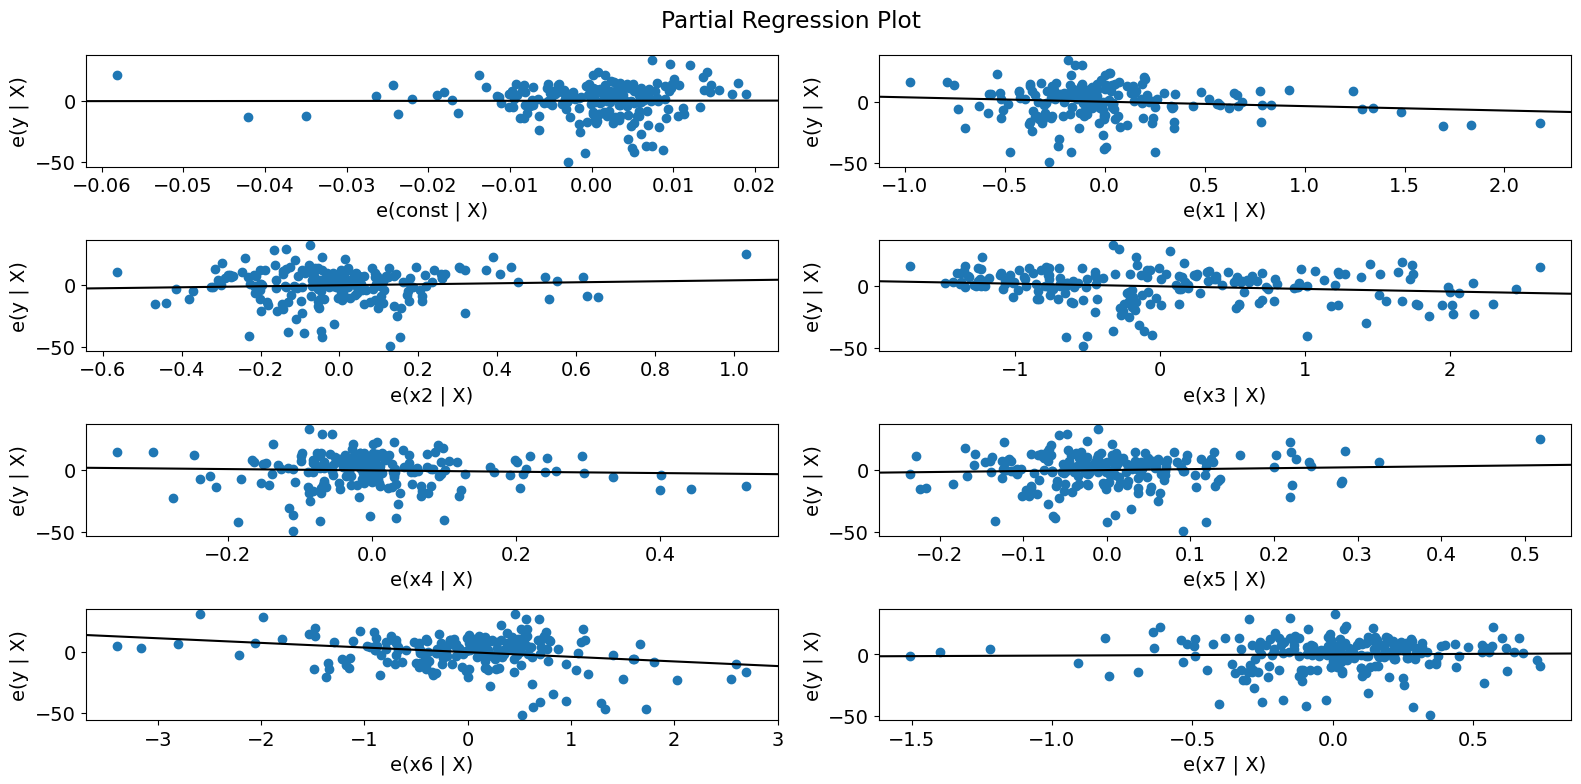

In [31]:
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

fig = sm.graphics.plot_partregress_grid(est2)
fig.tight_layout(pad=1.0)

* The R^2 of train

In [32]:
y_trained = regr.predict(X_train)
y_trained
r_sqr_train = r2_score(y_train, y_trained)
print("R^2: %.2f" % r_sqr_train)

R^2: 0.28


that means the model is not flexible enough

# Desision tree

In [33]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=4, max_depth=4, min_samples_leaf=2)
clf = clf.fit(X_train, y_classificated_train)

[Text(0.6538461538461539, 0.9, 'x[0] <= 24.672\ngini = 0.285\nsamples = 209\nvalue = [36, 173]'),
 Text(0.5769230769230769, 0.7, 'x[5] <= 3.85\ngini = 0.246\nsamples = 202\nvalue = [29, 173]'),
 Text(0.3076923076923077, 0.5, 'x[2] <= 4.167\ngini = 0.177\nsamples = 184\nvalue = [18, 166]'),
 Text(0.15384615384615385, 0.3, 'x[3] <= 4.653\ngini = 0.093\nsamples = 164\nvalue = [8, 156]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.051\nsamples = 154\nvalue = [4, 150]'),
 Text(0.46153846153846156, 0.3, 'x[5] <= 3.1\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.8461538461538461, 0.5, 'x[2] <= 3.814\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.7692307692307693, 0.3, 'x[4] <= 8.647\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.69230769

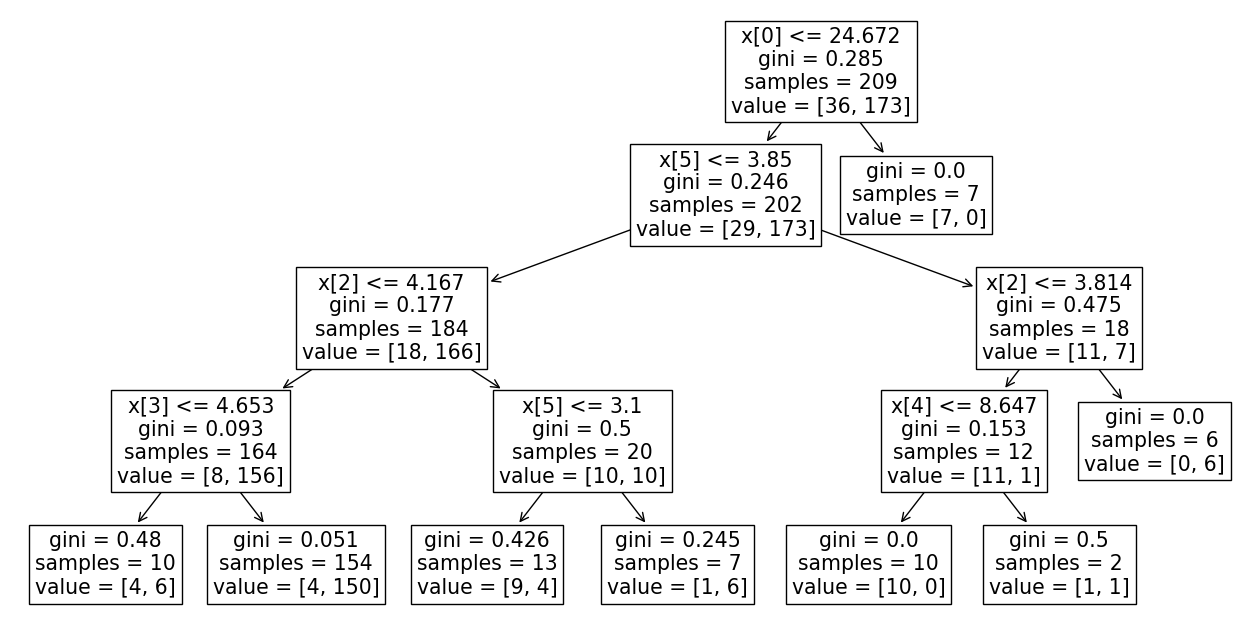

In [34]:
tree.plot_tree(clf)

In [35]:
from sklearn.tree import export_text

In [36]:
r = export_text(clf, feature_names=features)
print(r)

|--- PE_RATIO <= 24.67
|   |--- Known_inflation_1Y <= 3.85
|   |   |--- 5Y GENERIC <= 4.17
|   |   |   |--- PE Yield <= 4.65
|   |   |   |   |--- class: 1
|   |   |   |--- PE Yield >  4.65
|   |   |   |   |--- class: 1
|   |   |--- 5Y GENERIC >  4.17
|   |   |   |--- Known_inflation_1Y <= 3.10
|   |   |   |   |--- class: 0
|   |   |   |--- Known_inflation_1Y >  3.10
|   |   |   |   |--- class: 1
|   |--- Known_inflation_1Y >  3.85
|   |   |--- 5Y GENERIC <= 3.81
|   |   |   |--- Fwd PE Yield <= 8.65
|   |   |   |   |--- class: 0
|   |   |   |--- Fwd PE Yield >  8.65
|   |   |   |   |--- class: 0
|   |   |--- 5Y GENERIC >  3.81
|   |   |   |--- class: 1
|--- PE_RATIO >  24.67
|   |--- class: 0



In [37]:
y_pred = clf.predict(X_test)

In [38]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_classificated_test, y_pred))

Accuracy: 0.625


In [39]:
precision_tree = metrics.precision_score(y_classificated_test, y_pred, average=None)
print("Precision:", precision_tree)

Precision: [0.39285714 0.95      ]


In [40]:
recall_tree = metrics.recall_score(y_classificated_test, y_pred, average=None)
print("Recall:", recall_tree)

Recall: [0.91666667 0.52777778]


In [41]:
y_classificated_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [42]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0])

In [43]:
def concat_test(y_classificated_test, y_pred, index, days_for_test, y, df):
    classed = pd.DataFrame(y_classificated_test, index=index, columns=['Classified'])
    pred = pd.DataFrame(y_pred, index=index, columns=['Predicted'])
    sp = pd.DataFrame(y[-days_for_test:], index=index, columns=['SP500 one year forward'])
    dates = df[-days_for_test:][['date']]
    return pd.concat([dates,sp, classed, pred], axis=1)

In [44]:
concat_test(y_classificated_test, y_pred, index_test, days_for_test, y, df)

,date,SP500 one year forward,Classified,Predicted
59,2/28/2019,8.192942,1,1
58,3/29/2019,-6.977894,0,1
57,4/30/2019,0.863109,1,1
56,5/31/2019,12.837567,1,1
55,6/28/2019,7.505099,1,1
54,7/31/2019,11.957612,1,1
53,8/30/2019,21.936751,1,1
52,9/30/2019,15.148978,1,1
51,10/31/2019,9.710640,1,1
50,11/29/2019,17.456410,1,1


### This month

In [45]:
y_pred_this_month = clf.predict(X_this_month)
y_pred_this_month

array([1])

In [46]:
y_pred_this_year = clf.predict(X_this_year)
y_pred_this_year

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

### Viz the tree

In [47]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = features,class_names=['3','4','5'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

### Grid search for the tree

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [49]:
# hyperparameter tuning
def grid_search():
    param_grid = {
        'max_depth': [2,3,4],
        'min_samples_leaf': [3 , 8 ,10],
        'class_weight': [
                         {0: 3, 1:1},
                         {0: 2, 1:3},
                         {0: 7, 1:5}
                        ]
    }
    
    clf = tree.DecisionTreeClassifier(random_state=5)
    search = RandomizedSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=3)
    search.fit(X_train,y_classificated_train)

    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

In [50]:
start = time.time()

grid_search()

end = time.time()
# print('execution time in minutes: ', (end - start)/60) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter (CV score=0.809):
{'min_samples_leaf': 8, 'max_depth': 4, 'class_weight': {0: 7, 1: 5}}


In [51]:
clf = tree.DecisionTreeClassifier(random_state=4, max_depth=2, min_samples_leaf=8, class_weight={0: 7, 1: 3})
clf.fit(X_train,y_classificated_train)
y_pred = clf.predict(X_test)
precision_tree = metrics.precision_score(y_classificated_test, y_pred, average=None)
recall_tree = metrics.recall_score(y_classificated_test, y_pred, average=None)
print("Accuracy:",metrics.accuracy_score(y_classificated_test, y_pred))

Accuracy: 0.8125


In [52]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_classificated_test, y_pred))

Accuracy: 0.8125


In [53]:
precision_tree

array([0.57894737, 0.96551724])

In [54]:
recall_tree

array([0.91666667, 0.77777778])

In [55]:
y_pred = clf.predict(X_test)

In [56]:
y_classificated_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [57]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0])

In [58]:
y_pred_this_year = clf.predict(X_this_year)
y_pred_this_year

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
concat_test(y_classificated_test, y_pred, index_test, days_for_test, y, df)

,date,SP500 one year forward,Classified,Predicted
59,2/28/2019,8.192942,1,1
58,3/29/2019,-6.977894,0,1
57,4/30/2019,0.863109,1,1
56,5/31/2019,12.837567,1,1
55,6/28/2019,7.505099,1,1
54,7/31/2019,11.957612,1,1
53,8/30/2019,21.936751,1,1
52,9/30/2019,15.148978,1,1
51,10/31/2019,9.710640,1,1
50,11/29/2019,17.456410,1,1


# RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
pipline = Pipeline(steps=[
    ('model', RandomForestClassifier())
])

Possible scorings: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [62]:
# hyperparameter tuning
def grid_search():
    param_grid = {
        'model__n_estimators': n_estimators,
        'model__max_features': max_features,
        'model__max_depth': max_depth,
        'model__min_samples_split': min_samples_split,
        'model__min_samples_leaf': min_samples_leaf,
        'model__bootstrap': bootstrap
    }
    global search
    global scoring
    scoring = 'f1_macro'
    # scoring = 'recall'
    # scoring = 'precision'
    search = RandomizedSearchCV(pipline, param_grid, cv=5, n_jobs=-1, verbose=3, scoring=scoring)
    search.fit(X_train,y_classificated_train)

    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

In [63]:
start = time.time()

grid_search()

end = time.time()
print('execution time in minutes: ', (end - start)/60)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameter (CV score=0.575):
{'model__n_estimators': 329, 'model__min_samples_split': 6, 'model__min_samples_leaf': 5, 'model__max_features': 'sqrt', 'model__max_depth': 3, 'model__bootstrap': False}
execution time in minutes:  0.0214438001314799


/Users/kiril/anaconda3/envs/NTC_main/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kiril/anaconda3/envs/NTC_main/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kiril/anaconda3/envs/NTC_main/lib/python3.9/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/kiril/anaconda3/envs/NTC_main/lib/python3.9/site-packages/sklearn/pipeline.py", line 427

In [64]:
optimal_parameters = search.best_params_.copy()
optimal_parameters = pd.DataFrame([optimal_parameters])
optimal_parameters

,model__n_estimators,model__min_samples_split,model__min_samples_leaf,model__max_features,model__max_depth,model__bootstrap
0,329,6,5,sqrt,3,False


In [65]:
rf = RandomForestClassifier(n_estimators=optimal_parameters['model__n_estimators'][0],
                            min_samples_split=optimal_parameters['model__min_samples_split'][0],
                            min_samples_leaf=optimal_parameters['model__min_samples_leaf'][0],
                            max_features=optimal_parameters['model__max_features'][0],
                            max_depth=optimal_parameters['model__max_depth'][0],
                            bootstrap=optimal_parameters['model__bootstrap'][0])
rf.fit(X_train,y_classificated_train)

RandomForestClassifier(bootstrap=False, max_depth=3, min_samples_leaf=5,
                       min_samples_split=6, n_estimators=329)

In [66]:
y_pred = rf.predict(X_test)
precision_rf = metrics.precision_score(y_classificated_test, y_pred, average=None).round(2)
recall_rf = metrics.recall_score(y_classificated_test, y_pred, average=None).round(2)

In [67]:
print("Accuracy:",metrics.accuracy_score(y_classificated_test, y_pred))

Accuracy: 0.7291666666666666


In [68]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0])

In [69]:
y_classificated_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [70]:
precision_rf

array([0.48, 0.96])

In [71]:
recall_rf

array([0.92, 0.67])

### This month

In [72]:
y_pred_this_month = rf.predict(X_this_month)
y_pred_this_month

array([1])

In [73]:
y_pred_this_year = rf.predict(X_this_year)
y_pred_this_year

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
concat_test(y_classificated_test, y_pred, index_test, days_for_test, y, df)

,date,SP500 one year forward,Classified,Predicted
59,2/28/2019,8.192942,1,1
58,3/29/2019,-6.977894,0,1
57,4/30/2019,0.863109,1,1
56,5/31/2019,12.837567,1,1
55,6/28/2019,7.505099,1,1
54,7/31/2019,11.957612,1,1
53,8/30/2019,21.936751,1,1
52,9/30/2019,15.148978,1,1
51,10/31/2019,9.710640,1,1
50,11/29/2019,17.456410,1,1


### Results

In [75]:
# rf_results = search.best_params_.copy()
# rf_results.update({'days for test' : days_for_test,
#                    'Regression R^2 of train' : r_sqr_train,
#                    'Regression R^2 of test' : r_sqr_test,
#                    'Tree_precision' : precision_tree,
#                    'Tree_recall' : recall_tree,
#                     'Forest_Scoring' : scoring,
#                     'Forest_Precision' : precision_rf,
#                    'Forest_Recall' : recall_rf,
#                     'Forest_Target' : target,
#                     'Range' : (increase),
#                      'Forest_y_pred' : y_pred,
#                      'Forest_y_test' : y_classificated_test,
#                        'features' : features,
#                       'A forecast for the next year' : y_pred_this_month})

In [76]:
# current_rf_results = pd.DataFrame([rf_results])
# current_rf_results

In [77]:
# only one time
# current_rf_results.to_csv('rf_results.csv', index= False)

In [78]:
# past_rf_results = pd.read_csv("rf_results.csv")
# past_rf_results

In [79]:
# pd.concat([past_rf_results, current_rf_results], ignore_index=True).to_csv("./rf_results.csv", index= False)

In [80]:
# pd.read_csv("rf_results.csv")

# XGBOOST

### random example

In [81]:
# # Import packages
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder          
# from sklearn.model_selection import train_test_split  
# import matplotlib.pyplot as plt 
# import numpy as np
# import xgboost as xgb

# # Read data
# url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# data = pd.read_csv(url)

# # Check missing values
# data.isnull().sum()
# # Drop columns with too many missing values
# data.drop('Cabin', axis=1, inplace=True)
# # Drop data with missing values 
# data.dropna(inplace=True)

# # Inspect data
# data.head()
# # Transfrom attribute
# le = LabelEncoder()
# data['Sex'] = le.fit_transform(data['Sex'])

# # Decide variables to use
# X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
# y = data['Survived']

# # train/test split (80/20)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# # XGBoost (different learning rate)
# learning_rate_range = np.arange(0.01, 1, 0.05)
# test_XG = [] 
# train_XG = []
# for lr in learning_rate_range:
#     xgb_classifier = xgb.XGBClassifier(eta = lr)
#     xgb_classifier.fit(x_train, y_train)
#     train_XG.append(xgb_classifier.score(x_train, y_train))
#     test_XG.append(xgb_classifier.score(x_test, y_test))
# # Line plot
# fig = plt.figure(figsize=(10, 7))
# plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
# plt.plot(learning_rate_range, test_XG, c='m', label='Test')
# plt.xlabel('Learning rate')
# plt.xticks(learning_rate_range)
# plt.ylabel('Accuracy score')
# plt.ylim(0.6, 1)
# plt.legend(prop={'size': 12}, loc=3)
# plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
# plt.show()

# # Resolve overfitting 
# # new learning rate range
# learning_rate_range = np.arange(0.01, 0.5, 0.05)
# fig = plt.figure(figsize=(19, 17))
# idx = 1
# # grid search for min_child_weight
# for weight in np.arange(0, 4.5, 0.5):
#     train = []
#     test = []
#     for lr in learning_rate_range:
#         xgb_classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
#         xgb_classifier.fit(x_train, y_train)
#         train.append(xgb_classifier.score(x_train, y_train))
#         test.append(xgb_classifier.score(x_test, y_test))
#     fig.add_subplot(3, 3, idx)
#     idx += 1
#     plt.plot(learning_rate_range, train, c='orange', label='Training')
#     plt.plot(learning_rate_range, test, c='m', label='Testing')
#     plt.xlabel('Learning rate')
#     plt.xticks(learning_rate_range)
#     plt.ylabel('Accuracy score')
#     plt.ylim(0.6, 1)
#     plt.legend(prop={'size': 12}, loc=3)
#     title = "Min child weight:" + str(weight)
#     plt.title(title, size=16)
# plt.show()

### model

In [82]:
import xgboost as xgb

In [83]:
model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [84]:
# Train the model
model.fit(X_train, y_classificated_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [85]:
# Make predictions on the test set
y_pred = model.predict(X_test,)

In [86]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_classificated_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [87]:
precision_xgb = metrics.precision_score(y_classificated_test, y_pred, average=None)
recall_xgb = metrics.recall_score(y_classificated_test, y_pred, average=None)

In [88]:
precision_xgb

array([0.5       , 0.76086957])

In [89]:
recall_xgb

array([0.08333333, 0.97222222])

In [90]:
y_classificated_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [91]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

In [92]:
concat_test(y_classificated_test, y_pred, index_test, days_for_test, y, df)

,date,SP500 one year forward,Classified,Predicted
59,2/28/2019,8.192942,1,1
58,3/29/2019,-6.977894,0,1
57,4/30/2019,0.863109,1,1
56,5/31/2019,12.837567,1,1
55,6/28/2019,7.505099,1,1
54,7/31/2019,11.957612,1,1
53,8/30/2019,21.936751,1,1
52,9/30/2019,15.148978,1,1
51,10/31/2019,9.710640,1,1
50,11/29/2019,17.456410,1,1


#### This month

In [93]:
y_pred_this_month = model.predict(X_this_month)
y_pred_this_month

array([0])

In [94]:
y_pred_this_year = model.predict(X_this_year)
y_pred_this_year

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

### Grid search

In [95]:
from sklearn.model_selection import GridSearchCV
# Create an XGBoost classifier with grid search for hyperparameter tuning
model_grid = xgb.XGBClassifier(objective='binary:logistic', min_child_weight=0.001, random_state=41)

# Define hyperparameters for fine-tuning with broader ranges
param_grid = {
    'learning_rate': np.logspace(-3, 0, 4),  # Range from 0.001 to 1
    'max_depth': np.arange(3, 6, 1),  # Range from 3 to 7
    'n_estimators': np.arange(40, 160, 40),  # Range from 10 to 160
    'subsample': np.arange(0, 1.1, 0.3),  # Range from 0 to 1.0
    'colsample_bytree': np.arange(0, 1.1, 0.3)  # Range from 0 to 1.0
}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(estimator=model_grid, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_classificated_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_classificated_test, y_pred)
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"F1 Score: {f1:.2f}")

Best Hyperparameters: {'colsample_bytree': 0.0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 40, 'subsample': 0.0}
F1 Score: 0.86


In [96]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_classificated_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


In [97]:
precision_xgb_grid = metrics.precision_score(y_classificated_test, y_pred, average=None)
recall_xgb_grid = metrics.recall_score(y_classificated_test, y_pred, average=None)

/Users/kiril/anaconda3/envs/NTC_main/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
precision_xgb_grid

array([0.  , 0.75])

In [99]:
recall_xgb_grid

array([0., 1.])

In [100]:
y_classificated_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [101]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

#### This month

In [102]:
y_pred_this_month = best_model.predict(X_this_month)
y_pred_this_month

array([1])

In [103]:
y_pred_this_year = best_model.predict(X_this_year)
y_pred_this_year

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [104]:
concat_test(y_classificated_test, y_pred, index_test, days_for_test, y, df)

,date,SP500 one year forward,Classified,Predicted
59,2/28/2019,8.192942,1,1
58,3/29/2019,-6.977894,0,1
57,4/30/2019,0.863109,1,1
56,5/31/2019,12.837567,1,1
55,6/28/2019,7.505099,1,1
54,7/31/2019,11.957612,1,1
53,8/30/2019,21.936751,1,1
52,9/30/2019,15.148978,1,1
51,10/31/2019,9.710640,1,1
50,11/29/2019,17.456410,1,1
